In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
matplotlib.rcParams["figure.dpi"] = 1200


In [4]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

from nonconformist.base import ClassifierAdapter
from nonconformist.icp import IcpClassifier
from nonconformist.nc import ClassifierNc

data = load_iris()
x, y = data.data, data.target

import numpy as np
x = np.load('Snapshot_sample.npy')
y = np.load('y_sample.npy')
print(x.shape)
x = x.transpose(2,0,1).reshape(-1,x.shape[1])
y = y.ravel()

for i, y_ in enumerate(np.unique(y)):
	y[y == y_] = i

n_instances = y.size
idx = np.random.permutation(n_instances)
train_idx = idx[:int(n_instances / 3)]
cal_idx = idx[int(n_instances / 3):2 * int(n_instances / 3)]
test_idx = idx[2 * int(n_instances / 3):]

nc = ClassifierNc(ClassifierAdapter(RandomForestClassifier(n_estimators=100)))
icp = IcpClassifier(nc)

icp.fit(x[train_idx, :], y[train_idx])
icp.calibrate(x[cal_idx, :], y[cal_idx])


df_out =pd.DataFrame(icp.predict_conf(x[test_idx, :]),
				   columns=['Label', 'Confidence', 'Credibility'])
df_out['Label'] = df_out['Label'].astype(int)
df_out

(1173, 240, 95)


,Label,Confidence,Credibility
0,0,0.958008,0.469704
1,0,0.998618,0.980395
2,0,0.957770,0.292023
3,0,0.955283,0.368427
4,0,0.952623,0.261977
5,0,0.940738,0.171743
6,0,0.994071,0.442465
7,0,0.965838,0.537420
8,0,0.992197,0.198774
9,0,0.981407,0.264179


Text(0, 0.5, 'Credibility')

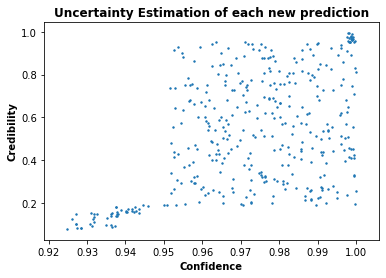

In [5]:
plt.scatter(df_out['Confidence'], df_out['Credibility'], s=2)
plt.title("Uncertainty Estimation of each new prediction", fontweight='bold')
plt.xlabel("Confidence", fontweight='bold')
plt.ylabel("Credibility", fontweight='bold')

In [6]:
df_tmp = pd.read_csv("confidence.csv")

In [2]:
import pandas as pd
df_final = pd.read_csv('final.csv',index_col=0)


,Disk Model,Status,p-Failed,p-Normal,Confidence,Credibility
Serialno,,,,,,
CNG232SSMK,ATA VO0600ECHPP,1,0.350616,0.139531,0.639344,0.350616
7GH133X,ST3600057SS,1,0.213115,0.139531,0.766183,0.213115
6CU318ZP86,HP EG0600FBLSH,1,0.213115,0.139531,0.766183,0.213115
6CU315YNR6,HP EG0600FBDSR,1,0.229508,0.139531,0.770492,0.229508
6CU309XN4C,MB2000GCQXQ,1,0.163934,0.132736,0.836066,0.163934
7Z3D63X,ST32000644NS,1,0.180328,0.139531,0.819672,0.180328
G58CD3X,ST2000NM0011,1,0.213115,0.139531,0.766183,0.213115
213042652,WDC WD2000FYYZ-01UL1B0,1,0.163934,0.081967,0.836066,0.163934
7JNL2Y1,ST3600057SS,1,0.649732,0.139531,0.344262,0.649732


In [7]:
cols = ['Disk Model','Status', 'Confidence', 'Credibility']
df_tp = df_final
df_tp['Status'] =1
df_tp = df_tp[cols] 
df_tp.rename({'Status': 'Failure'}, axis=1, inplace=True)
df_tp

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Disk Model,Failure,Confidence,Credibility
Serialno,,,,
CNG232SSMK,ATA VO0600ECHPP,1,0.639344,0.350616
7GH133X,ST3600057SS,1,0.766183,0.213115
6CU318ZP86,HP EG0600FBLSH,1,0.766183,0.213115
6CU315YNR6,HP EG0600FBDSR,1,0.770492,0.229508
6CU309XN4C,MB2000GCQXQ,1,0.836066,0.163934
7Z3D63X,ST32000644NS,1,0.819672,0.180328
G58CD3X,ST2000NM0011,1,0.766183,0.213115
213042652,WDC WD2000FYYZ-01UL1B0,1,0.836066,0.163934
7JNL2Y1,ST3600057SS,1,0.344262,0.649732


In [48]:
df_failed = df_final[df_final['Status']=='Failed']

In [49]:
df_low = df_failed.query('0.3 > Confidence')

In [50]:
df_medium = df_failed.query('0.3 < Confidence < 0.7')

In [51]:
df_high = df_failed.query('Confidence > 0.7')

In [52]:
from IPython.display import display, HTML

def pretty_print(df):
    return display(HTML(df.to_html()))

In [53]:
df2= df_failed[['Disk Model', 'Confidence']]


In [54]:
df2.head()
df2.describe

<bound method NDFrame.describe of                                            Disk Model  Confidence
Serialno                                                         
CNG232SSMK                            ATA VO0600ECHPP    0.639344
7GH133X                                   ST3600057SS    0.766183
6CU318ZP86                             HP EG0600FBLSH    0.766183
6CU315YNR6                             HP EG0600FBDSR    0.770492
6CU309XN4C                                MB2000GCQXQ    0.836066
7Z3D63X                                  ST32000644NS    0.819672
G58CD3X                                  ST2000NM0011    0.766183
213042652                      WDC WD2000FYYZ-01UL1B0    0.836066
7JNL2Y1                                   ST3600057SS    0.344262
JNJ06L1                                   ST3300657SS    0.766183
DHTT43X                                   ST3300657SS    0.766183
210231771610B7000906                      ST3300657SS    0.766183
06KTKT6               ST2000NM0011 81Y9795

In [55]:
col=[]
for val in df2.Confidence:
    if val < 0.3:
        col.append('green')
    elif val >= 0.7:
        col.append('red')
    else:
        col.append('orange')

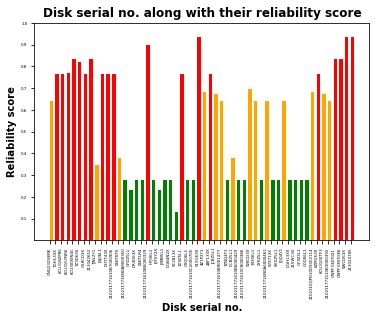

In [57]:
x1=df2.index.get_level_values('Serialno')
y1=df2['Confidence']
fig = plt.figure()
ax = fig.add_subplot()
plt.bar(x1, y1, color = col, align='edge', width=0.6)
plt.title("Disk serial no. along with their reliability score", fontweight='bold')
plt.xlabel("Disk serial no.",fontweight='bold')
plt.ylabel("Reliability score", fontweight='bold')
plt.tick_params(labelsize=4)
plt.xticks(rotation='vertical')
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])




In [58]:
df2.index.get_level_values('Serialno')

Index(['CNG232SSMK', '7GH133X', '6CU318ZP86', '6CU315YNR6', '6CU309XN4C',
       '7Z3D63X', 'G58CD3X', '213042652', '7JNL2Y1', 'JNJ06L1', 'DHTT43X',
       '210231771610B7000906', '06KTKT6', '2102317716N0A8000350', 'GFDZ5L1',
       'DR3D63X', '06KTLR4', '210231771610B6000329', 'HPJ06L1', 'J8T6Y2X',
       'JBMB5L1', 'DGB4N2X', '9C2813X', '1D9Z5L1', 'C0Q06L1',
       '210231771610B6000329', '210231771610C2000705', '519G63X', '4Z1P2Y1',
       '4BF133X', 'JCBZ5L1', '210231771610B9001477', '7ZNQ4Y1', 'DCBZ5L1',
       '210231771610B6000429', '210231771610C8000386', '928CD3X', '74306L1',
       '2Y6Z5L1', '2102317716N0A6000462', '57X713X', '5HDZ5L1', '1D9Z5L1',
       'JTJQ4Y1', 'DGH133X', '215WC3X', 'GF9Z5L1', 'G0Q06L1',
       '2102310QPD10D9002114', '6ZMG53X', '6CU310XTF3', '210231771510B3000392',
       'CWPF3387021', 'CWPF338703B', '5WCD63X', '213024780'],
      dtype='object', name='Serialno')

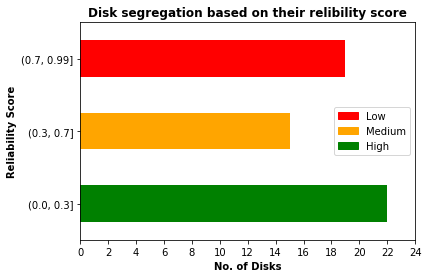

Confidence
(0.0, 0.3]     22
(0.3, 0.7]     15
(0.7, 0.99]    19
Name: Confidence, dtype: int64

In [59]:

from matplotlib.patches import Patch

bins = (0,0.3,0.7,0.99)
col = ['green','orange','red']
colours = {"male": "#273c75", "female": "#44bd32"}
fig = plt.figure()
ax = fig.add_subplot()
df = df_failed.groupby(pd.cut(df_failed['Confidence'], bins=bins)).Confidence.count()

#ax= plot(df,kind='barh', figsize=(10,6))
axes = df.plot.barh(rot=0, subplots=True, color=col)



plt.title("Disk segregation based on their relibility score", fontweight='bold')
plt.xlabel("No. of Disks", fontweight='bold')
plt.ylabel("Reliability Score", fontweight='bold')

colors = {'Low':'red', 'Medium':'orange', 'High':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
ax.set_xticks([i for i in range(0,25,2)])



plt.show()
df


In [72]:
!python3 oob_calibration.py

Classification: Disk Failure
              class_mean_errors  class_avg_c
significance                                
0.05                   0.048000     1.010667
0.10                   0.088000     0.934667
0.20                   0.184000     0.824000
0.30                   0.272000     0.732000
0.40                   0.450667     0.550667
0.50                   0.572000     0.429333
Absolute error regression: diabetes
              reg_mean_errors  reg_median_size
significance                                  
0.05                 0.048856       229.310252
0.10                 0.100444       191.760099
0.20                 0.199132       149.783811
0.30                 0.297370       123.898781
0.40                 0.397344       102.256094
0.50                 0.500501        82.763364


In [74]:
oob_error = pd.read_csv('oob.csv',index_col=0)

#  OOB(out-of-bag) error

In [75]:
oob_error

,class_mean_errors,class_avg_c
significance,,
0.05,0.042000,1.016015
0.10,0.095000,0.892587
0.20,0.194413,0.800361
0.30,0.298000,0.684638
0.40,0.467000,0.494184
0.50,0.601000,0.387000


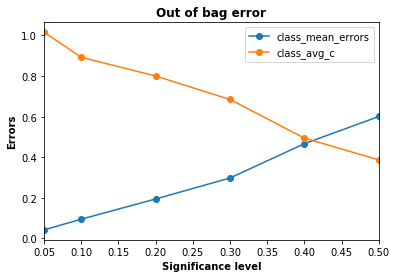

In [76]:
oob_error.plot(marker="o")
plt.title("Out of bag error", fontweight='bold')
plt.ylabel("Errors", fontweight='bold')
plt.xlabel("Significance level", fontweight='bold')
plt.show()